Random code, ignore this

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

from fxvol.backtest import run_backtest
from fxvol.data_utils import load_csv
from fxvol.fin_comp import qlike_loss
from fxvol.models import NaiveModel, RollingMeanModel, EWMA

# Data

HORIZON = 5
log_ret = load_csv("processed", "log_returns").dropna()
eur_ret = log_ret["EUR"]
df_res = run_backtest(eur_ret, EWMA(), horizon=HORIZON)
y_true = df_res["y_true"]
y_pred = df_res["y_pred"]

<Axes: xlabel='Date'>

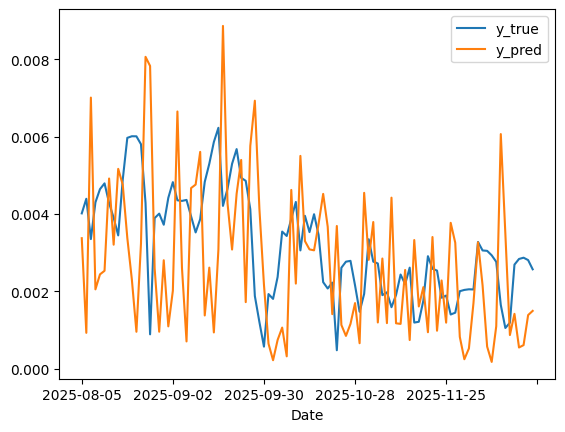

In [3]:
df_res.iloc[-100:].plot(y=['y_true', 'y_pred'])

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]

In [ ]:
# use darts plotting style
from darts import set_option

set_option("plotting.use_darts_style", True)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

In [ ]:
from darts import TimeSeries

In [ ]:
from fxvol.data_utils import load_csv
historic_vol = load_csv('processed', 'historic_vol')
historic_vol.dropna(inplace=True)

In [ ]:
historic_vol.index = pd.to_datetime(historic_vol.index)

In [ ]:
series = TimeSeries.from_dataframe(historic_vol[['EUR']], freq='D')

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(historic_vol[['EUR']],  maxlag=100, regression='ctt')

In [ ]:
# p-value
adf_result[1]
# Small -> No unit root, i.e. stationary series

In [ ]:
eur = historic_vol[['EUR']].diff().dropna()

In [ ]:
adf_result = adfuller(eur,  maxlag=100, regression='ctt')
adf_result[1]

In [ ]:
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

In [ ]:
series.plot()

In [ ]:
train, val = series.split_before(pd.Timestamp("20200101"))
train.plot(label="training")
val.plot(label="validation")

In [ ]:
from darts.metrics import mape

In [ ]:
from darts.models import AutoARIMA, ExponentialSmoothing, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(f"model {model} obtains MAPE: {mape(val, forecast):.2f}%")


eval_model(ExponentialSmoothing())
eval_model(AutoARIMA())
eval_model(Theta())

In [ ]:
from darts.models import AutoARIMA, ExponentialSmoothing, Theta

In [ ]:
model = AutoARIMA()
model.fit(train)
pred = model.predict(len(val))

In [ ]:
train.plot(label="training")
val.plot(label="validation")
pred.plot(label='prediction')

In [ ]:
hist_for = model.historical_forecasts(series=series, start=0.8, val_length=21, forecast_horizon=21, stride=21, verbose=True)

In [ ]:
_, val80 = series.split_after(0.80)

In [ ]:
val80.plot()
hist_for.plot()

In [ ]:
print(mape(val80, hist_for))

In [ ]:
from darts.models.forecasting.baselines import NaiveMovingAverage, NaiveDrift

In [ ]:
model = NaiveMovingAverage(input_chunk_length=1)
#model = NaiveDrift()
model.fit(train)
pred = model.predict(len(val))

In [ ]:
hist_for = model.historical_forecasts(series=series, start=0.8, forecast_horizon=21, stride=21, verbose=True)

In [ ]:
val80.plot()
hist_for.plot()

In [ ]:
print(mape(val80, hist_for))

In [ ]:
from darts.models import ARIMA

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
gs = ARIMA.gridsearch({'p': [1, 5, 20], 'd': [0], 'q': [1]}, series=series, forecast_horizon=21, stride = 210, verbose=True, show_warnings=False, start=0.5)

In [ ]:
model = gs[0]

In [ ]:
hist_for = model.historical_forecasts(series=series, start=0.8, val_length=21, forecast_horizon=21, stride=210, verbose=True)

In [ ]:
print(mape(val80, hist_for))

In [ ]:
val80.plot()
hist_for.plot()